In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import numpy as np 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
df = pd.read_excel(io=file)


# outputting the first ten rows of the dataset
df.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
df.isnull().any()

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [3]:
meduc_med = df ['meduc'].median()
df['meduc'].fillna(value = meduc_med,
                       inplace = True)

npvis_med = df ['npvis'].median()
df['npvis'].fillna(value = npvis_med,
                       inplace = True)


feduc_med = df ['feduc'].median()
df['feduc'].fillna(value = feduc_med,
                       inplace = True)

In [4]:
df.isnull().any()

mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

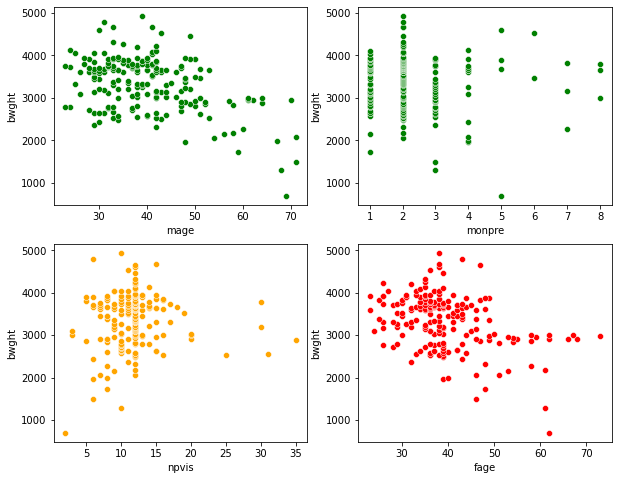

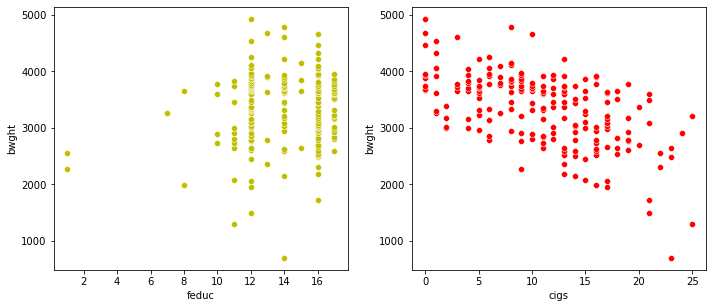

In [5]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['mage'],
                y = df['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'mage')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = df['monpre'],
                y = df['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'monpre')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = df['npvis'],
                y = df['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'npvis')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = df['fage'],
                y = df['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'bwght')



########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = df['feduc'],
                y = df['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'feduc')
plt.ylabel(ylabel = 'bwght')


###################


# developing a scatterplot
plt.subplot(3, 2, 6)
sns.scatterplot(x = df['cigs'],
                y = df['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'bwght')


########################



########################



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

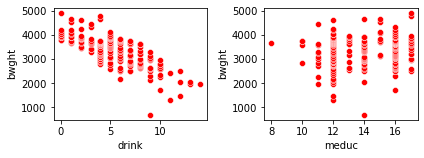

In [6]:
# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['drink'],
                y = df['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')



##################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = df['meduc'],
                y = df['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


In [7]:
continuous_data = [ 'bwght','mage',
'meduc',
'monpre',
'npvis' ,
'fage', 
'feduc',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth', 
'fwhte',
'fblck' ,
'foth']

# developing a correlation matrix based on continuous features
df_corr = df[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
df_corr.loc[ : , continuous_data].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03
moth,-0.02,0.02,0.46,-0.21,0.06,0.03,0.52,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83
fwhte,-0.04,-0.08,-0.18,0.04,0.03,-0.03,-0.36,-0.01,0.07,-0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49
monpre,-0.05,0.16,-0.23,1.00,-0.34,0.04,-0.29,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07


In [8]:
#df['log_bwght'] = np.log(df['bwght'])
df['log_meduc'] = np.log(df['meduc'])
df['log_monpre']   = np.log(df['monpre'])
df['log_fage']   = np.log(df['fage'])
df['log_feduc'] = np.log(df['feduc'])
df['log_npvis'] = np.log(df['npvis'])
df['log_bwght'] = np.log(df['bwght'])



#sum +0.0009 because there are variable 0
df['log_cigs']   = np.log(df['cigs'] + 0.00009)
df['log_drink']   = np.log(df['drink'] + 0.00009)




In [9]:
for column in df:
    print(column +' +' )

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +
log_bwght +
log_cigs +
log_drink +


In [10]:
continuous_data_log = [ 'bwght','mage',
'meduc',
'monpre',
'npvis' ,
'fage', 
'feduc',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth', 
'fwhte',
'fblck' ,
'foth',
'log_meduc',
'log_monpre',
'log_fage',
'log_feduc',
'log_npvis',
'log_cigs',
'log_drink']
                  

# developing a correlation matrix based on continuous features
df_corr = df[continuous_data_log].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
df_corr.loc[ : , continuous_data_log].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,log_meduc,log_monpre,log_fage,log_feduc,log_npvis,log_cigs,log_drink
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08,0.09,-0.06,-0.38,0.16,0.16,-0.37,-0.41
log_npvis,0.16,-0.17,0.20,-0.45,0.92,-0.13,0.11,-0.00,-0.10,0.01,-0.02,-0.11,0.14,-0.00,-0.08,0.09,0.20,-0.42,-0.11,0.01,1.00,-0.05,0.01
log_feduc,0.16,-0.11,0.43,-0.28,-0.09,-0.05,0.89,-0.01,-0.13,0.11,-0.35,-0.02,0.35,-0.29,-0.04,0.35,0.43,-0.26,-0.04,1.00,0.01,-0.01,-0.06
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.62,-0.27,-0.00,0.89,0.11,0.01,-0.05
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44,-0.19,0.12,-0.06,-0.02,-0.11,-0.11,-0.05
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48,-0.23,0.06,-0.05,-0.04,-0.08,-0.13,-0.02
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08,-0.03,-0.09,-0.08,0.11,0.01,0.01,-0.14
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,1.00,-0.25,-0.05,0.43,0.20,0.07,-0.06
log_meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.11,-0.07,-0.03,-0.27,-0.19,0.45,-0.18,-0.23,0.42,1.00,-0.25,-0.06,0.43,0.20,0.07,-0.07
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03,0.14,-0.33,-0.06,-0.09,0.92,-0.02,0.03


In [11]:
for column in df:
    print(column +' +' )

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +
log_bwght +
log_cigs +
log_drink +


In [12]:
lm_best = smf.ols(formula = """bwght ~ drink +
                                       cigs + 
                                       mage +
                                       
                                       log_meduc+
                                       fage 
                                       
                                        
                                        
                                        
                                        
                                      
                                        """,
                            data = df)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     94.27
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.49e-49
Time:                        11:51:56   Log-Likelihood:                -1423.9
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     190   BIC:                             2879.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4228.4730    470.770      8.982      0.0

In [13]:
# preparing explanatory variable data
df_data   = df.drop(["bwght",
                      "log_bwght"],
                        axis = 1)

df_target = df.loc[ : , "bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 24)
y-side: (147,)


Testing Data
------------
X-side: (49, 24)
y-side: (49,)



In [14]:
x_variables = ['mage','monpre', 'npvis', 'fage','feduc', 'cigs', 'drink',
                'male', 'mwhte','mblck','moth','fwhte','fblck', 'foth','log_meduc',
              'log_monpre','log_fage','log_feduc', 'log_npvis']

for val in x_variables:
    print(f"{val} +")

mage +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +


In [15]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)


lm_best = smf.ols(formula = """bwght ~  mage +
                                        cigs +
                                        drink + 
                                        log_feduc +
                                        log_npvis 
                                        
                                        """,
                            data = df_train)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     75.37
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.23e-38
Time:                        11:51:57   Log-Likelihood:                -1069.0
No. Observations:                 147   AIC:                             2150.
Df Residuals:                     141   BIC:                             2168.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4158.3672    350.063     11.879      0.0

In [16]:
x_variables2 = ['mage', 'cigs', 'drink','log_feduc', 'log_npvis']

In [17]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = df.loc[:, x_variables2]


# preparing response variable
df_target = df.loc[:,"bwght"]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df_data,     # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [18]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7277
OLS Testing Score  : 0.6196
OLS Train-Test Gap : 0.1081


In [19]:
import sklearn.linear_model # linear models

In [20]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7502
Lasso Testing Score  : 0.6045
Lasso Train-Test Gap : 0.1457


In [21]:
# zipping each feature name to its coefficient
lasso_model_values = zip(df.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3243.08)
('mage', -13.1)
('meduc', 15.72)
('monpre', 0.0)
('npvis', -6.82)
('fage', -2.46)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 78.52)
('cigs', -36.57)
('drink', -104.89)
('male', 50.86)
('mwhte', 2.15)
('mblck', 0.0)
('moth', -73.66)
('fwhte', 0.0)
('fblck', 0.0)
('foth', -0.0)
('bwght', 0.0)
('log_meduc', 28.32)
('log_monpre', -0.0)
('log_fage', 131.49)
('log_feduc', 204.26)
('log_npvis', 0.0)
('log_bwght', 9.87)


In [22]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3243.08)
('mage', -13.1)
('meduc', 15.72)
('npvis', -6.82)
('fage', -2.46)
('omaps', 0.0)
('fmaps', 78.52)
('cigs', -36.57)
('drink', -104.89)
('male', 50.86)
('mwhte', 2.15)
('moth', -73.66)
('fblck', 0.0)
('bwght', 0.0)
('log_meduc', 28.32)
('log_fage', 131.49)
('log_feduc', 204.26)
('log_bwght', 9.87)


In [23]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score =  ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7408
Testing Score : 0.6173
ARD Train-Test Gap : 0.1235


In [24]:
# zipping each feature name to its coefficient
ard_model_values = zip(df_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3605.96)
('mage', -15.11066)
('meduc', 8.71163)
('monpre', 0.00151)
('npvis', -0.00133)
('fage', -0.00605)
('feduc', 0.00153)
('omaps', 0.0003)
('fmaps', 73.10095)
('cigs', -38.46816)
('drink', -106.87382)
('male', 16.37971)
('mwhte', 0.00091)
('mblck', 0.00028)
('moth', -41.274)
('fwhte', 4e-05)
('fblck', 0.00031)
('foth', -0.00043)
('log_meduc', 0.00222)
('log_monpre', 0.00164)
('log_fage', -0.00134)
('log_feduc', 122.56371)
('log_npvis', 108.90109)
('log_cigs', 0.00066)
('log_drink', 8.15337)


In [25]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3605.96)
('mage', -15.11066)
('meduc', 8.71163)
('monpre', 0.00151)
('npvis', -0.00133)
('fage', -0.00605)
('feduc', 0.00153)
('omaps', 0.0003)
('fmaps', 73.10095)
('cigs', -38.46816)
('drink', -106.87382)
('male', 16.37971)
('mwhte', 0.00091)
('mblck', 0.00028)
('moth', -41.274)
('fwhte', 4e-05)
('fblck', 0.00031)
('foth', -0.00043)
('log_meduc', 0.00222)
('log_monpre', 0.00164)
('log_fage', -0.00134)
('log_feduc', 122.56371)
('log_npvis', 108.90109)
('log_cigs', 0.00066)
('log_drink', 8.15337)


In [26]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}             {ard_test_score}
""")








Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7277           0.6196
Lasso      0.7502           0.6045
ARD        0.7408             0.6173



In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(df_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(df_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-3.62,-1.43,-2.37,-8.31,-4.84,-4.38,-3.99
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.91,-0.05,-0.46,-0.36,-0.26,0.03,0.16
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.51,0.05,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,0.12,-0.05,-0.04,0.13,0.26,0.27,0.24
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.51,0.05,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49,1.01,0.76,0.53,0.56,0.26,0.40,0.39
max,3.02,1.52,4.19,5.54,3.76,1.22,1.15,1.59,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49,1.41,2.71,2.98,0.75,3.31,0.60,0.64


In [29]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = df_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(df_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
mage          104.527593
meduc           4.140436
monpre          1.827025
npvis          17.840561
fage           80.277671
feduc           6.656680
omaps           2.472616
fmaps           0.422194
cigs           37.035714
drink           8.964077
male            0.247397
mwhte           0.197288
mblck           0.236230
moth            0.226572
fwhte           0.226572
fblck           0.224984
foth            0.214364
log_meduc       0.022405
log_monpre      0.252097
log_fage        0.046697
log_feduc       0.097629
log_npvis       0.123468
log_cigs        6.354585
log_drink       6.650712
dtype: float64


Dataset AFTER Scaling
----------------------
mage          1.0
meduc         1.0
monpre        1.0
npvis         1.0
fage          1.0
feduc         1.0
omaps         1.0
fmaps         1.0
cigs          1.0
drink         1.0
male          1.0
mwhte         1.0
mblck         1.0
moth          1.0
fwhte         1.0
fblck         1.0
fot

In [30]:
# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 219)

In [31]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train,y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.3015
KNN Train-Test Gap: 0.6985


In [32]:
# final model

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}             {ard_test_score}
""")
print('my choice is Lasso, the final model is Lasso model')


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7277           0.6196
Lasso      0.7502           0.6045
ARD        0.7408             0.6173

my choice is Lasso, the final model is Lasso model
